## _Hacking PageRank_

En esta Notebook hacemos varios experimentos teniendo como objetivo encontrar el *precio* de tener mucha importancia en PageRank.

#### Primer Exp: _Cuantos sitios dummy_

Aquí veremos, de forma simple, cuantos sitios (nodos) dummy, con links a un sitio especial H, debemos agregar para que la importancia de H aumente, comenzando con que H no tiene ningún sitio apuntandolo.

#### Segundo Exp: _Estrella Vs Completo_

En este experimento comenzamos con un nodo H, y queremos agregar M nodos dummy que apunten hacia él, con el objetivo de mejorar su importancia. La pregunta es si conviene interconectar los M nodos entre si (aumentando la importancia de cada uno) o conviene dejarlos aíslados.

#### Tercer Exp: _Estrella Vs Linea (pasando por arbol)_

En este experimento intentamos ver que pasa cuando fijamos la cantidad de sitios fantasmas agregados y variamos el grado de entrada de cada uno (inclusive H), la idea es que, fijando este grado en di, primero pongo di sitios apuntando a H, luego a cada uno de estos di, le agrego di nodos apuntandolo, y asi (hasta usar todos los M).

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx

In [2]:
from exp_base import *
from generador_grafos import *
from grafos_utils import *

## Exp 1

In [3]:
matriz_fija = generar_grafo_random_m_fijo(1000, 5000)

In [4]:
df = pd.DataFrame(columns = ['p', 'm', 'val', 'val_dummy', 'grafo'])

for m in range(0, 1001, 100):
    print('m: {}'.format(m))
    grafo_a_agregar = generar_grafo_trivial(m+1) # el nodo m+1 es el especial
    for x in range(0, m):
        grafo_a_agregar[x][m] = 1
    for p in [0.05 + 0.1*i for i in range(0, 10)]:
        guardar_matriz_en_archivo(generar_grafo_union([matriz_fija, grafo_a_agregar]), 'hack_mtx.txt')
        out = ejecutar_con_args(['-o -', 'hack_mtx.txt', p])
        out = parsear_output(out)
        sum = 0.0
        for x in range(0, m):
            sum += float(out[1][1000+x])
        df.loc[len(df)] = [p, m, float(out[1][1000+m]), sum, grafo_a_agregar]
    

m: 0
m: 100
m: 200
m: 300
m: 400
m: 500
m: 600
m: 700
m: 800
m: 900
m: 1000


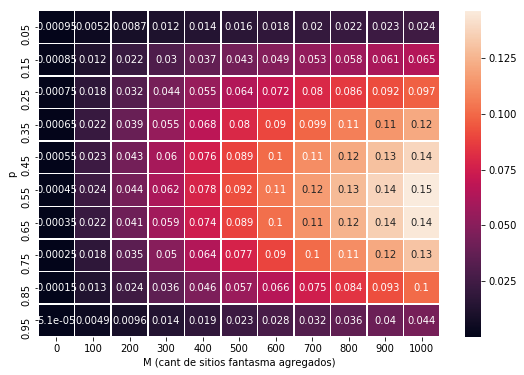

In [5]:
dfval = df.pivot('p', 'm', 'val')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(dfval, annot=True, linewidths=.5, ax=ax)
# ax.set_title('Hackeando PageRank: grafo estrella')
ax.set_ylabel('p')
ax.set_xlabel('M (cant de sitios fantasma agregados)')
f.savefig('img/hackestrella.png')

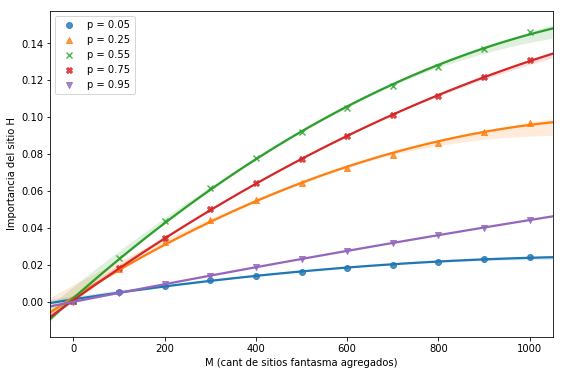

In [71]:
dffloat = df[['m', 'p', 'val']].astype(float)
# dffloat
f, ax = plt.subplots(figsize=(9, 6))
for i,m in [(0,'o'),(2,'^'),(5,'x'),(7,'X'),(9,'v')]:
    sns.regplot(ax=ax, marker=m, x='m', y='val', data=dffloat[dffloat.p == 0.05 + 0.1*i], order=2, label = 'p = 0.{}5'.format(i))
# sns.regplot(ax=ax, x='m', y='val', data=dffloat[dffloat.p == 0.55], order=2, label = 'p = 0.55')
# sns.regplot(ax=ax, x='m', y='val', data=dffloat[dffloat.p == 0.05 + 0.1*8], order=2, label = 'p = 0.85')
ax.set_ylabel('Importancia del sitio H')
ax.set_xlabel('M (cant de sitios fantasma agregados)')
ax.legend()
f.savefig('img/hackestrellapfijo.png')
# imprimir(df[df.p == 0.55][df.m==100].grafo)

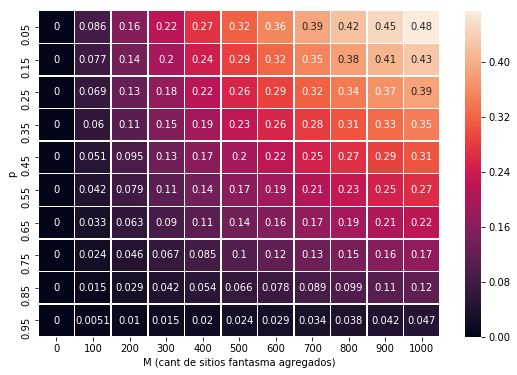

In [6]:
dfval = df.pivot('p', 'm', 'val_dummy')
dfval = dfval[dfval.columns].astype(float)

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(dfval, annot=True, linewidths=.5, ax=ax)
ax.set_ylabel('p')
ax.set_xlabel('M (cant de sitios fantasma agregados)')
f.savefig('img/hackestrelladummys.png')

In [27]:
dfart = pd.DataFrame(columns = ['p', 'm', 'val_dummy'])

for m in range(0, 1001, 100):
    print('m: {}'.format(m))
    for p in [0.05 + 0.1*i for i in range(0, 10)]:
        dfart.loc[len(dfart)] = [p, m, m*(1.0 - p)/(m+1001)] 

m: 0
m: 100
m: 200
m: 300
m: 400
m: 500
m: 600
m: 700
m: 800
m: 900
m: 1000


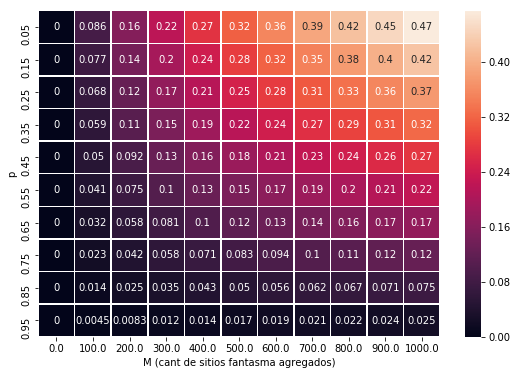

In [28]:
dfval = dfart.pivot('p', 'm', 'val_dummy')
dfval = dfval[dfval.columns].astype(float)

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(dfval, annot=True, linewidths=.5, ax=ax)
ax.set_ylabel('p')
ax.set_xlabel('M (cant de sitios fantasma agregados)')
f.savefig('img/hackestrelladummysart.png')

In [29]:
dfart2 = pd.DataFrame(columns = ['p', 'm', 'val'])

for m in range(0, 1001, 100):
    print('m: {}'.format(m))
    for p in [0.05 + 0.1*i for i in range(0, 10)]:
        importancia_dummys = m*(1.0 - p)/(m+1001)
        dfart2.loc[len(dfart2)] = [p, m, (1.0 - p)/(m+1001) + importancia_dummys*p] 

m: 0
m: 100
m: 200
m: 300
m: 400
m: 500
m: 600
m: 700
m: 800
m: 900
m: 1000


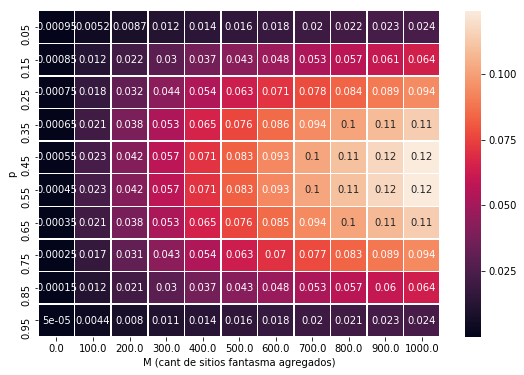

In [30]:
dfval = dfart2.pivot('p', 'm', 'val')
dfval = dfval[dfval.columns].astype(float)

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(dfval, annot=True, linewidths=.5, ax=ax)
ax.set_ylabel('p')
ax.set_xlabel('M (cant de sitios fantasma agregados)')
f.savefig('img/hackestrellaart.png')

## Exp 2

In [18]:
matriz_fija = generar_grafo_random_m_fijo(1000, 5000)

In [19]:
# Aca lo hago hasta alcanzar grado de 499 en todos los nodos fantasma, de 50 en 50
m = 500
df = pd.DataFrame(columns = ['d', 'p', 'grafo', 'val', 'val_dummy'])

for p in [0.05 + 0.1*i for i in range(0, 10)]:
    print('p: {}'.format(p))
    grafo_a_agregar = generar_grafo_trivial(m+1) # el nodo m es el especial
    for x in range(0, m):
        grafo_a_agregar[x][m] = 1 # conecto todos a m
    for d in range(0, 500, 50):
        print('d: {}'.format(d))
        if d:
            for dif in range(d-49, d+1):
                for x in range(0, m):
                    grafo_a_agregar[x][(x+dif)%m] = 1
        guardar_matriz_en_archivo(generar_grafo_union([matriz_fija, grafo_a_agregar]), 'hack_mtx.txt')
        out = ejecutar_con_args(['-o -', 'hack_mtx.txt', p])
        out = parsear_output(out)
        sum = 0.0
        for x in range(0, m):
            sum += float(out[1][1000+x])
        df.loc[len(df)] = [d, p, grafo_a_agregar.copy(), float(out[1][1000+m]), sum]


p: 0.05
d: 0
d: 50
d: 100
d: 150
d: 200
d: 250
d: 300
d: 350
d: 400
d: 450
p: 0.15000000000000002
d: 0
d: 50
d: 100
d: 150
d: 200
d: 250
d: 300
d: 350
d: 400
d: 450
p: 0.25
d: 0
d: 50
d: 100
d: 150
d: 200
d: 250
d: 300
d: 350
d: 400
d: 450
p: 0.35000000000000003
d: 0
d: 50
d: 100
d: 150
d: 200
d: 250
d: 300
d: 350
d: 400
d: 450
p: 0.45
d: 0
d: 50
d: 100
d: 150
d: 200
d: 250
d: 300
d: 350
d: 400
d: 450
p: 0.55
d: 0
d: 50
d: 100
d: 150
d: 200
d: 250
d: 300
d: 350
d: 400
d: 450
p: 0.6500000000000001
d: 0
d: 50
d: 100
d: 150
d: 200
d: 250
d: 300
d: 350
d: 400
d: 450
p: 0.7500000000000001
d: 0
d: 50
d: 100
d: 150
d: 200
d: 250
d: 300
d: 350
d: 400
d: 450
p: 0.8500000000000001
d: 0
d: 50
d: 100
d: 150
d: 200
d: 250
d: 300
d: 350
d: 400
d: 450
p: 0.9500000000000001
d: 0
d: 50
d: 100
d: 150
d: 200
d: 250
d: 300
d: 350
d: 400
d: 450


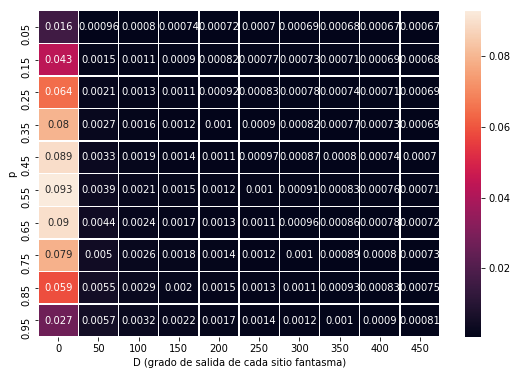

In [22]:
dfval = df.pivot('p', 'd', 'val')
dfval = dfval[dfval.columns].astype(float)

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(dfval, annot=True, linewidths=.5, ax=ax)
ax.set_ylabel('p')
ax.set_xlabel('D (grado de salida de cada sitio fantasma)')
f.savefig('img/hackgrado500.png')

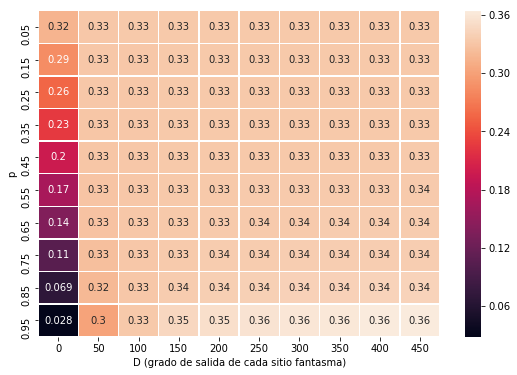

In [23]:
dfval = df.pivot('p', 'd', 'val_dummy')
dfval = dfval[dfval.columns].astype(float)

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(dfval, annot=True, linewidths=.5, ax=ax)
ax.set_ylabel('p')
ax.set_xlabel('D (grado de salida de cada sitio fantasma)')
f.savefig('img/hackgrado500dummy.png')

In [24]:
# Aca lo hago hasta alcanzar grado de 10 en todos los nodos fantasma, de 1 en 1
m = 500
df2 = pd.DataFrame(columns = ['d', 'p', 'grafo', 'val', 'val_dummy'])

for p in [0.05 + 0.1*i for i in range(0, 10)]:
    print('p: {}'.format(p))
    grafo_a_agregar = generar_grafo_trivial(m+1) # el nodo m es el especial
    for x in range(0, m):
        grafo_a_agregar[x][m] = 1 # conecto todos a m
    for d in range(0, 11, 1):
        print('d: {}'.format(d))
        if d:
            for dif in range(d, d+1):
                for x in range(0, m):
                    grafo_a_agregar[x][(x+dif)%m] = 1
        guardar_matriz_en_archivo(generar_grafo_union([matriz_fija, grafo_a_agregar]), 'hack_mtx.txt')
        out = ejecutar_con_args(['-o -', 'hack_mtx.txt', p])
        out = parsear_output(out)
        sum = 0.0
        for x in range(0, m):
            sum += float(out[1][1000+x])
        df2.loc[len(df2)] = [d, p, grafo_a_agregar.copy(), float(out[1][1000+m]), sum]


p: 0.05
d: 0
d: 1
d: 2
d: 3
d: 4
d: 5
d: 6
d: 7
d: 8
d: 9
d: 10
p: 0.15000000000000002
d: 0
d: 1
d: 2
d: 3
d: 4
d: 5
d: 6
d: 7
d: 8
d: 9
d: 10
p: 0.25
d: 0
d: 1
d: 2
d: 3
d: 4
d: 5
d: 6
d: 7
d: 8
d: 9
d: 10
p: 0.35000000000000003
d: 0
d: 1
d: 2
d: 3
d: 4
d: 5
d: 6
d: 7
d: 8
d: 9
d: 10
p: 0.45
d: 0
d: 1
d: 2
d: 3
d: 4
d: 5
d: 6
d: 7
d: 8
d: 9
d: 10
p: 0.55
d: 0
d: 1
d: 2
d: 3
d: 4
d: 5
d: 6
d: 7
d: 8
d: 9
d: 10
p: 0.6500000000000001
d: 0
d: 1
d: 2
d: 3
d: 4
d: 5
d: 6
d: 7
d: 8
d: 9
d: 10
p: 0.7500000000000001
d: 0
d: 1
d: 2
d: 3
d: 4
d: 5
d: 6
d: 7
d: 8
d: 9
d: 10
p: 0.8500000000000001
d: 0
d: 1
d: 2
d: 3
d: 4
d: 5
d: 6
d: 7
d: 8
d: 9
d: 10
p: 0.9500000000000001
d: 0
d: 1
d: 2
d: 3
d: 4
d: 5
d: 6
d: 7
d: 8
d: 9
d: 10


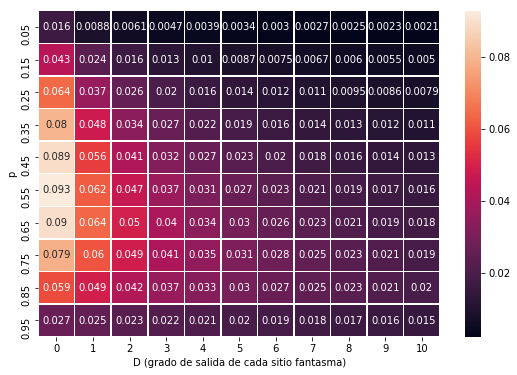

In [25]:
dfval = df2.pivot('p', 'd', 'val')
dfval = dfval[dfval.columns].astype(float)

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(dfval, annot=True, linewidths=.5, ax=ax)
ax.set_ylabel('p')
ax.set_xlabel('D (grado de salida de cada sitio fantasma)')
f.savefig('img/hackgrado10.png')

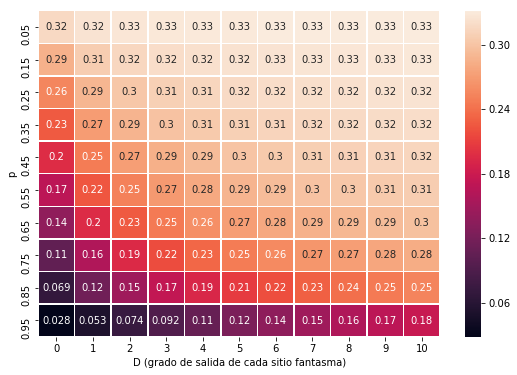

In [26]:
dfval = df2.pivot('p', 'd', 'val_dummy')
dfval = dfval[dfval.columns].astype(float)

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(dfval, annot=True, linewidths=.5, ax=ax)
ax.set_ylabel('p')
ax.set_xlabel('D (grado de salida de cada sitio fantasma)')
f.savefig('img/hackgrado10dummy.png')

## Exp 3

In [3]:
matriz_fija = generar_grafo_random_m_fijo(1000, 5000)

In [16]:
# m es el numero de nodos que agregamos, d la proporcion del grado de cada m
# d[i] = d*m
m = 500
ps = [0.05 + 0.1*i for i in range(0, 10)]
ds = [i for i in range(50, 501, 50)] +[1]
df = pd.DataFrame(columns = ['p', 'd', 'val', 'val_dummy', 'grafo'])


for p in ps:
    print('p: {}'.format(p))
    for di in ds:
        matriz_agregada = generar_grafo_trivial(1)
        #di = int((d/20.0)*m)
#         di = float(m)**(float(1.0/d))
#         print(d)
        print('di: {}'.format(di))
#         di = int(round(di))
        quedan = m
        
        nodosAAgregar = [0]
        # BFS, is that you?
        while quedan and nodosAAgregar:
            objetivo = nodosAAgregar[0]
            nodosAAgregar = nodosAAgregar[1:]
            nodosAAgregar += [i+len(matriz_agregada) for i in range(min(quedan, di))]
            
            matriz_agregada = agregar_grafo_estrella_hacia_adentro(matriz_agregada, min(quedan, di), len(matriz_agregada), objetivo)
            quedan = max(0, quedan-di)
        guardar_matriz_en_archivo(generar_grafo_union([matriz_fija, matriz_agregada]), 'hack_mtx.txt')
        out = ejecutar_con_args(['-o -', 'hack_mtx.txt', p])
#         print(out)
        out = parsear_output(out)
#         importancia[m][d] = out[1][200]
        sum = 0.0
        for x in range(0, m):
            sum += float(out[1][1000+x])
        df.loc[len(df)] = [p, di, float(out[1][1000]), sum, matriz_agregada.copy()]
#         print (out[1][1000])
        
        

p: 0.05
di: 50
di: 100
di: 150
di: 200
di: 250
di: 300
di: 350
di: 400
di: 450
di: 500
di: 1
p: 0.15000000000000002
di: 50
di: 100
di: 150
di: 200
di: 250
di: 300
di: 350
di: 400
di: 450
di: 500
di: 1
p: 0.25
di: 50
di: 100
di: 150
di: 200
di: 250
di: 300
di: 350
di: 400
di: 450
di: 500
di: 1
p: 0.35000000000000003
di: 50
di: 100
di: 150
di: 200
di: 250
di: 300
di: 350
di: 400
di: 450
di: 500
di: 1
p: 0.45
di: 50
di: 100
di: 150
di: 200
di: 250
di: 300
di: 350
di: 400
di: 450
di: 500
di: 1
p: 0.55
di: 50
di: 100
di: 150
di: 200
di: 250
di: 300
di: 350
di: 400
di: 450
di: 500
di: 1
p: 0.6500000000000001
di: 50
di: 100
di: 150
di: 200
di: 250
di: 300
di: 350
di: 400
di: 450
di: 500
di: 1
p: 0.7500000000000001
di: 50
di: 100
di: 150
di: 200
di: 250
di: 300
di: 350
di: 400
di: 450
di: 500
di: 1
p: 0.8500000000000001
di: 50
di: 100
di: 150
di: 200
di: 250
di: 300
di: 350
di: 400
di: 450
di: 500
di: 1
p: 0.9500000000000001
di: 50
di: 100
di: 150
di: 200
di: 250
di: 300
di: 350
di: 400
di: 45

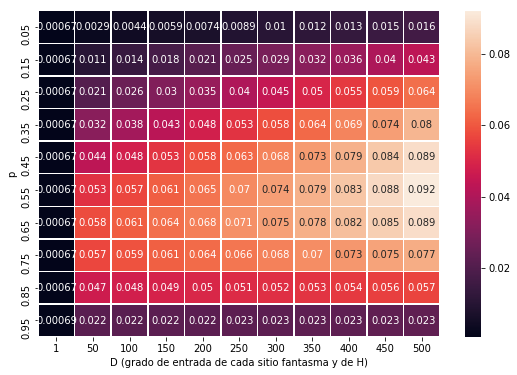

In [17]:
dfval = df.pivot('p', 'd', 'val')

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(dfval, annot=True, linewidths=.5, ax=ax)
ax.set_ylabel('p')
ax.set_xlabel('D (grado de entrada de cada sitio fantasma y de H)')
f.savefig('img/hackarbol.png')

## Creando grafos chiquitos para visualizar

In [30]:
# m es el numero de nodos que agregamos, d la proporcion del grado de cada m
# d[i] = d*m
m = 20
ds = [1, 5, 20]
grafos = []


for di in ds:
    matriz_agregada = generar_grafo_trivial(1)
    #di = int((d/20.0)*m)
#         di = float(m)**(float(1.0/d))
#         print(d)
    print('di: {}'.format(di))
#         di = int(round(di))
    quedan = m

    nodosAAgregar = [0]
    # BFS, is that you?
    while quedan and nodosAAgregar:
        objetivo = nodosAAgregar[0]
        nodosAAgregar = nodosAAgregar[1:]
        nodosAAgregar += [i+len(matriz_agregada) for i in range(min(quedan, di))]

        matriz_agregada = agregar_grafo_estrella_hacia_adentro(matriz_agregada, min(quedan, di), len(matriz_agregada), objetivo)
        quedan = max(0, quedan-di)
    grafos.append(matriz_agregada.copy())

di: 1
di: 5
di: 20


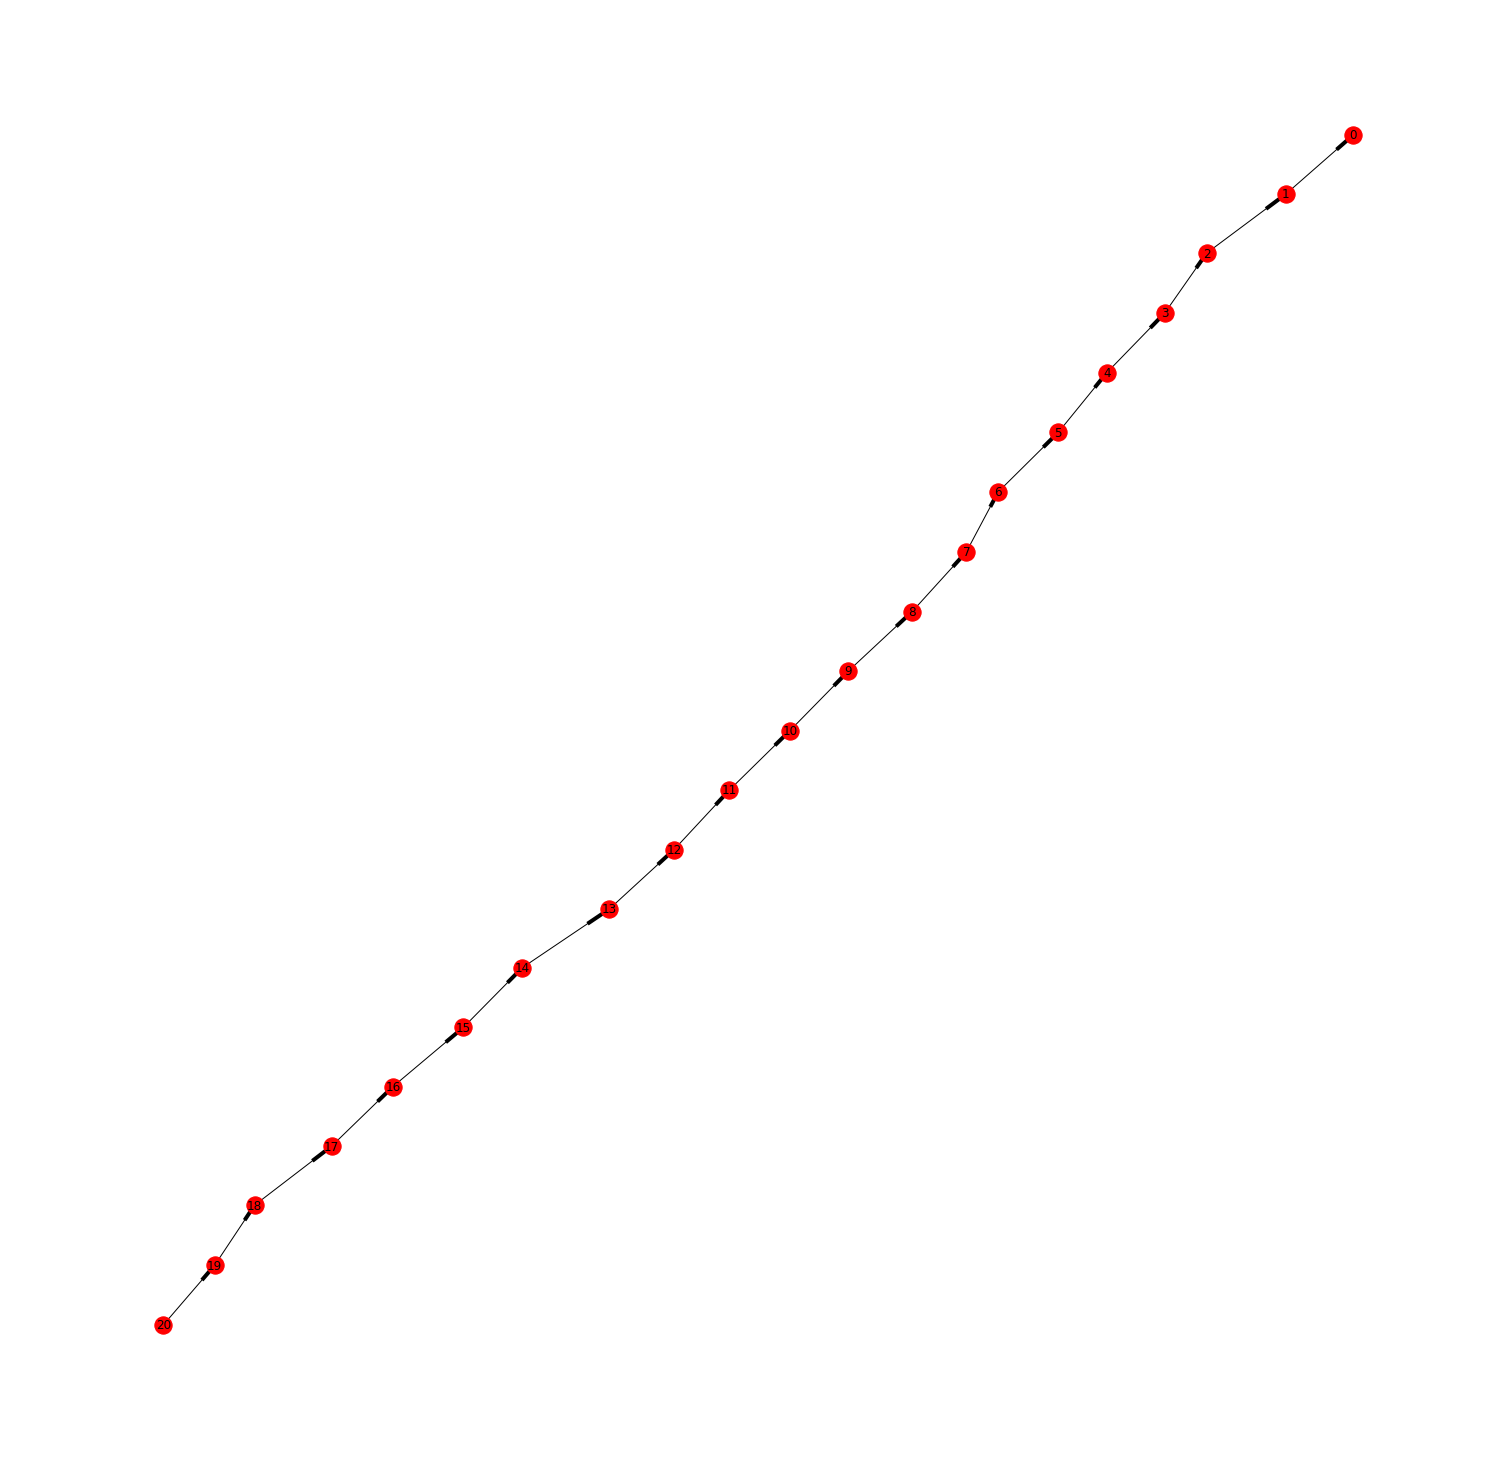

In [33]:
imprimir(grafos[0], 'img/hackarbolgrafo1.png')

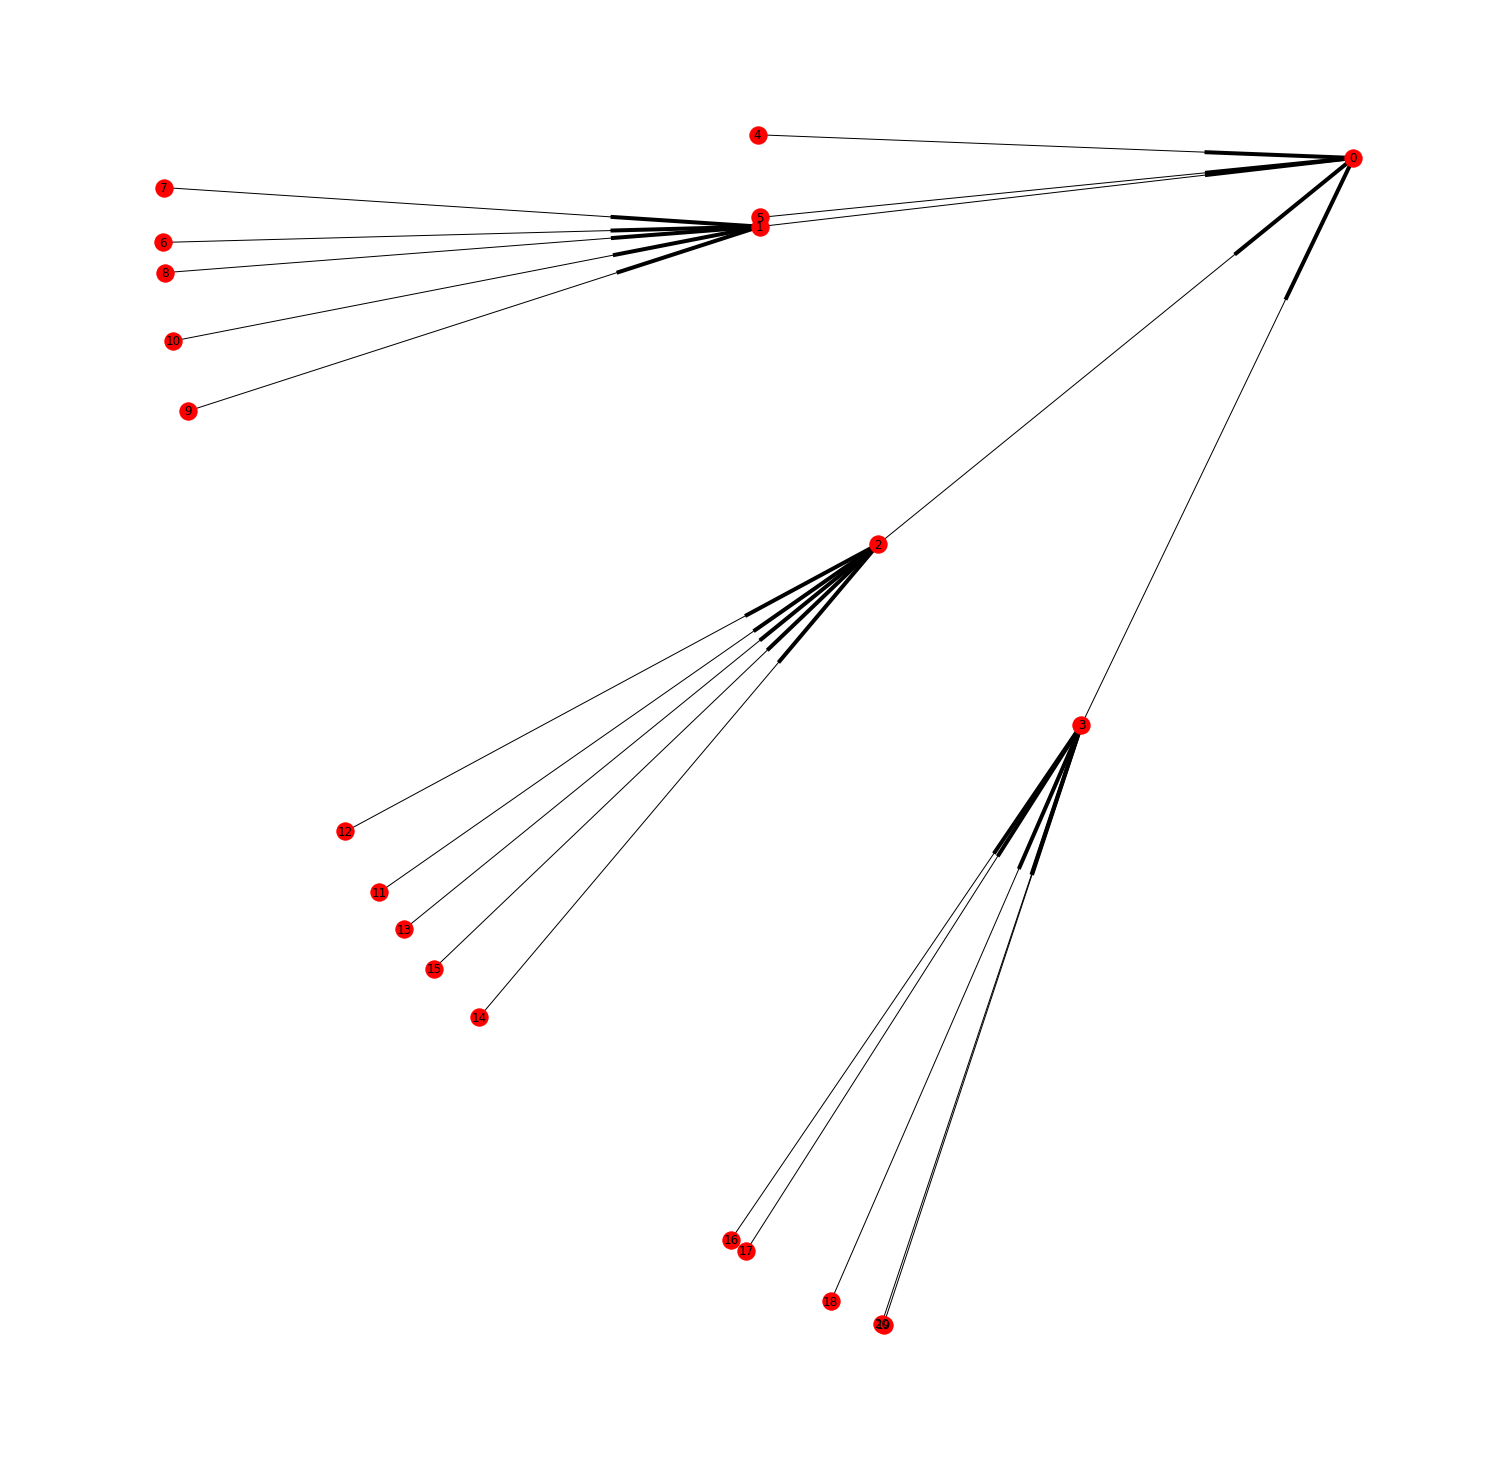

In [34]:
imprimir(grafos[1], 'img/hackarbolgrafo5.png')

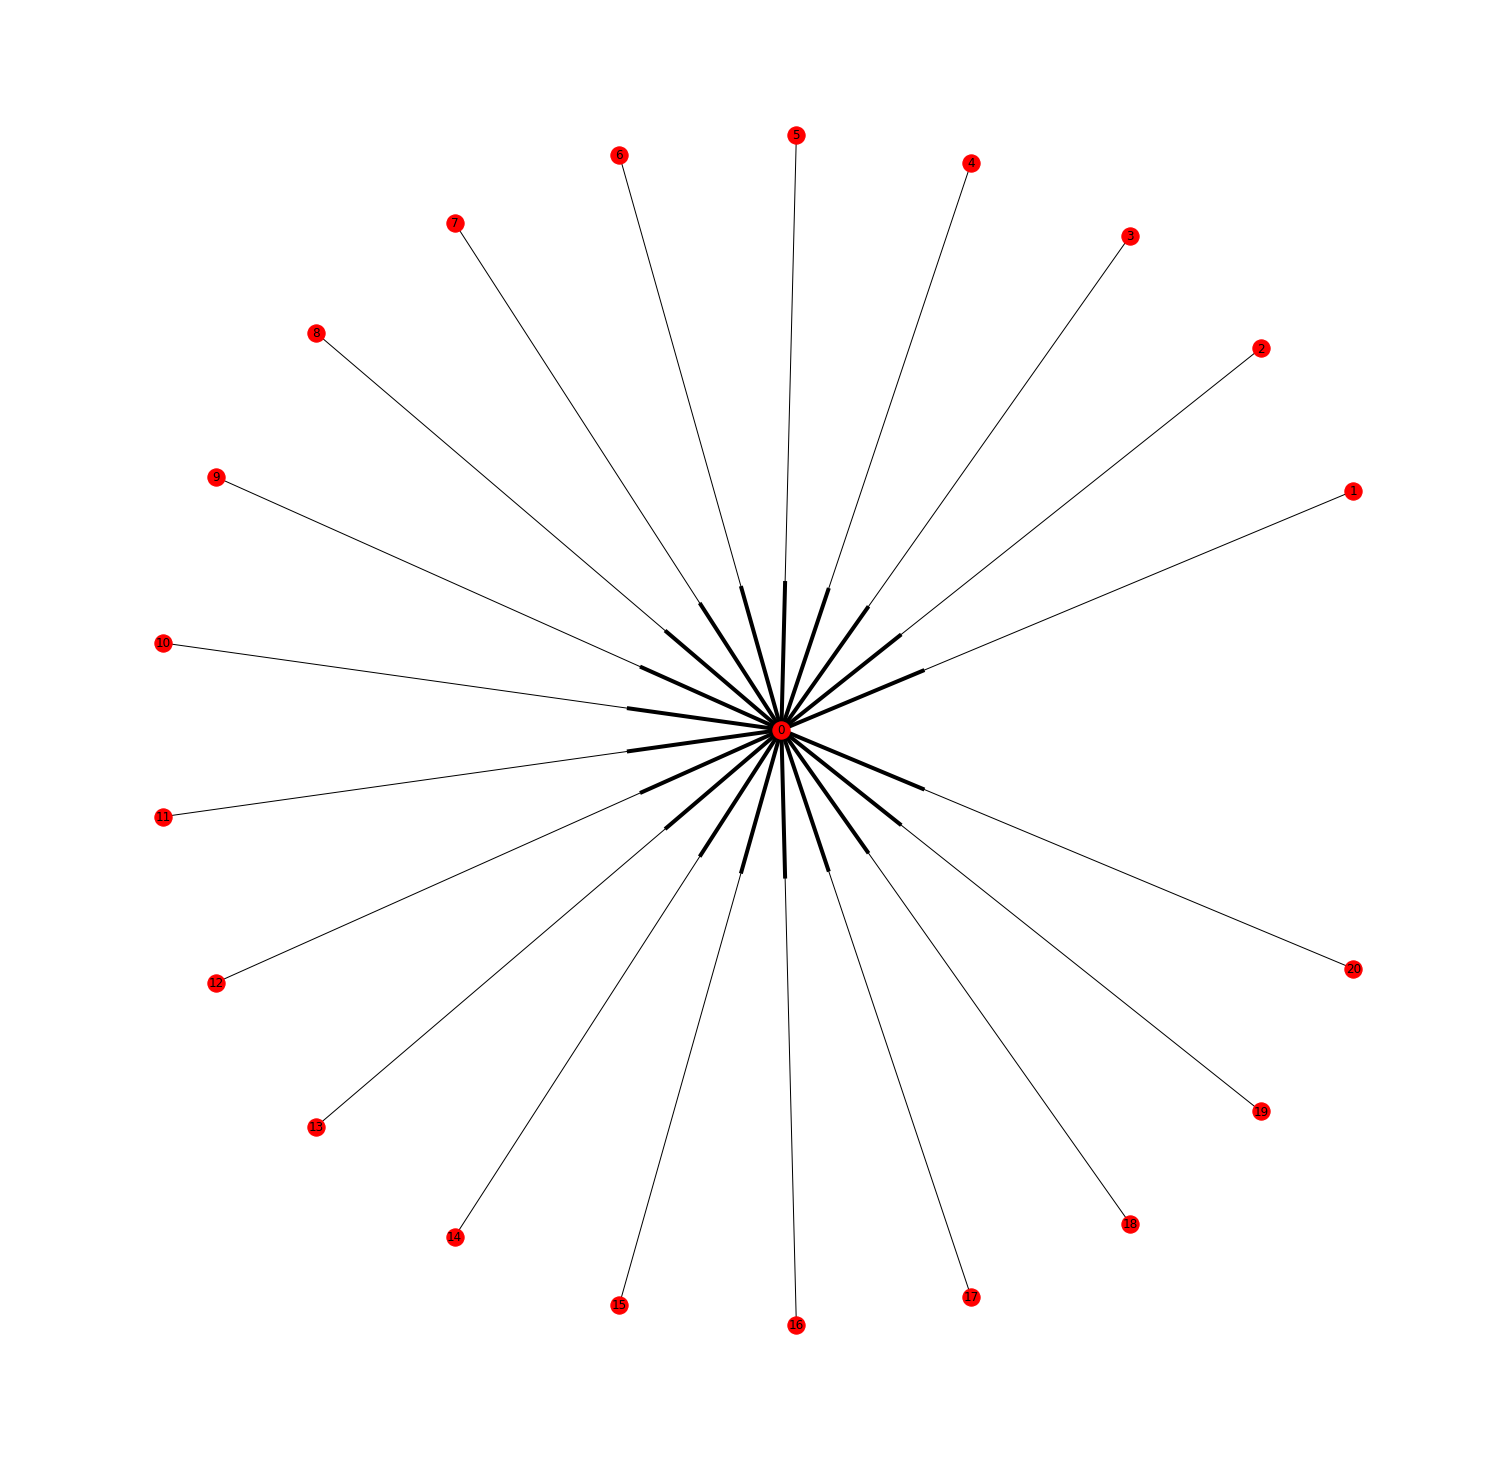

In [35]:
imprimir(grafos[2], 'img/hackarbolgrafo20.png')

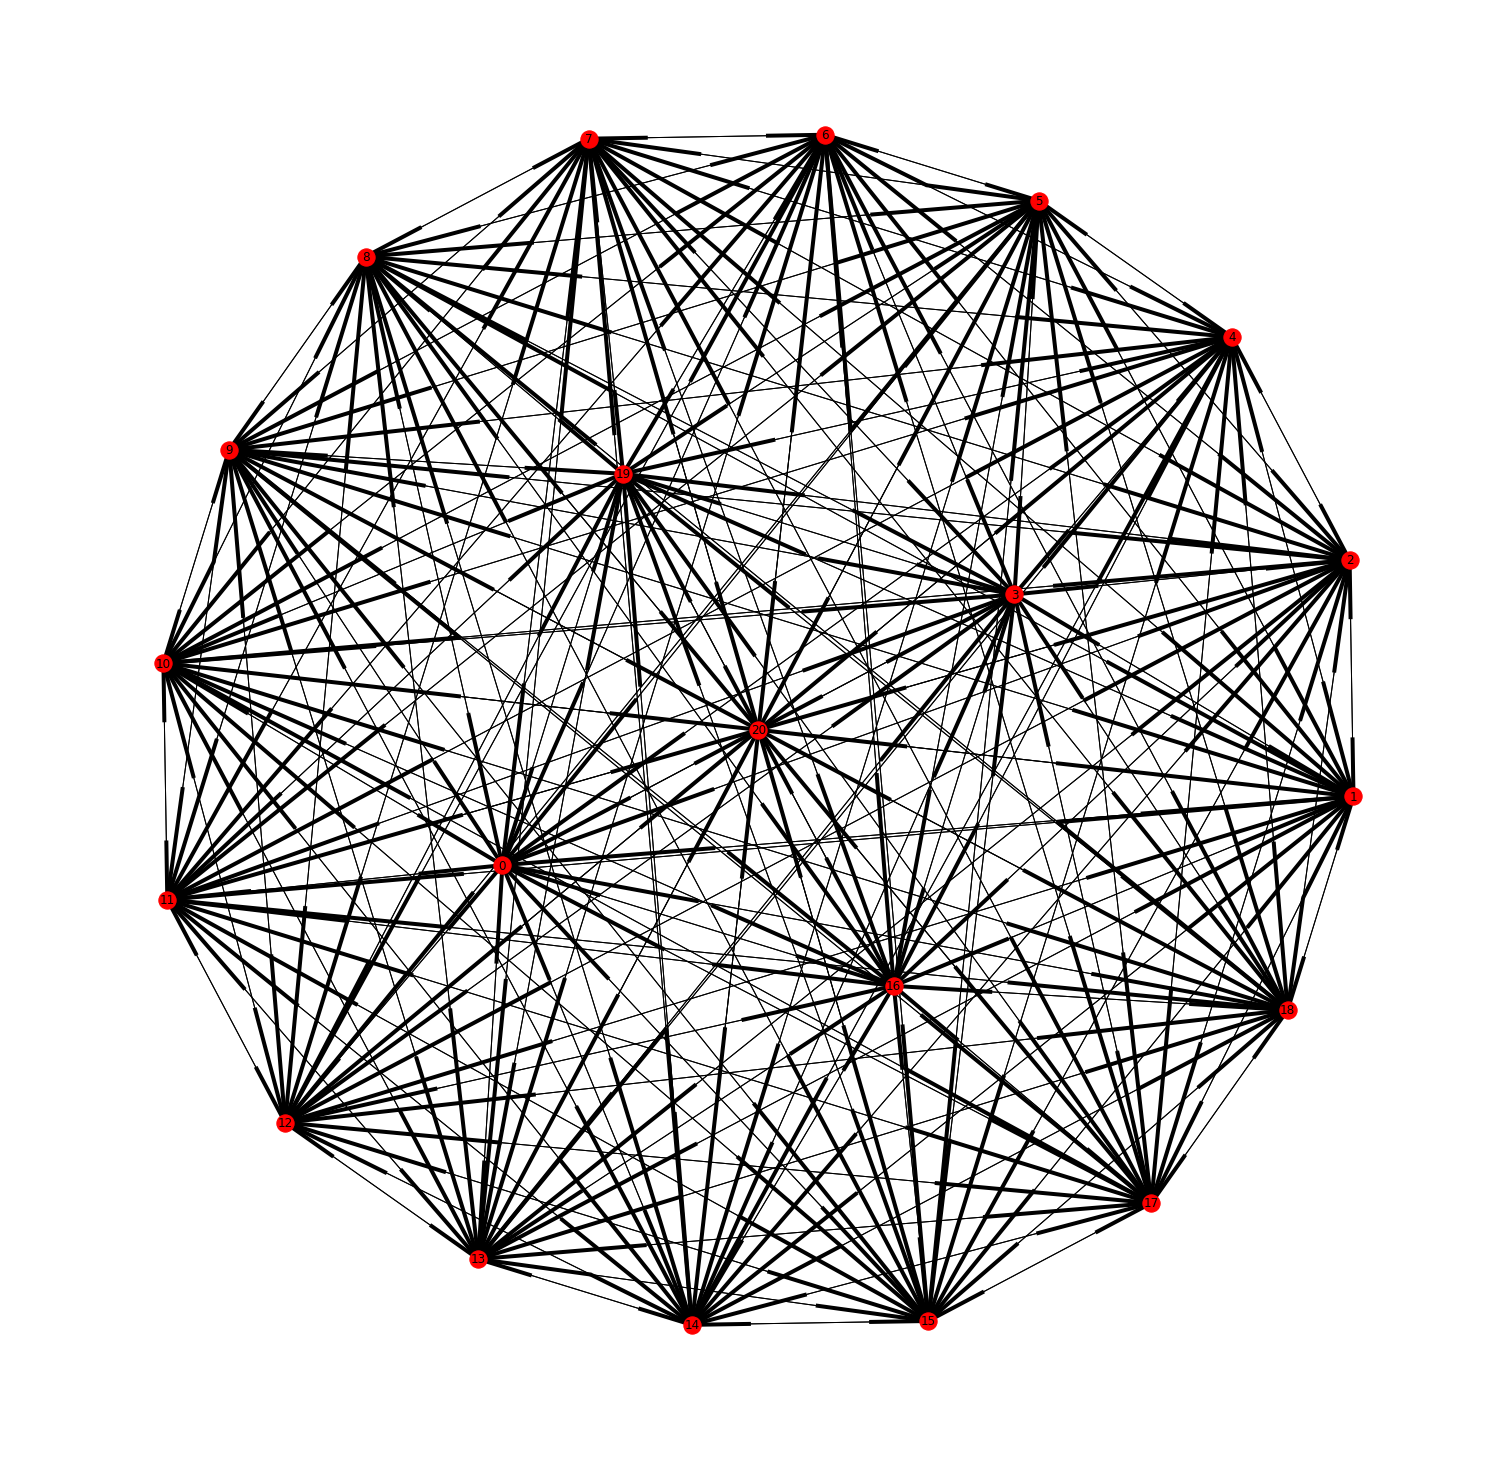

In [43]:
# Aca lo hago hasta alcanzar grado de 499 en todos los nodos fantasma, de 50 en 50
m = 20
grafos=[]

grafo_a_agregar = generar_grafo_trivial(m+1) # el nodo m es el especial
for x in range(0, m):
    grafo_a_agregar[x][m] = 1 # conecto todos a m
grafos.append(grafo_a_agregar.copy())

imprimir(grafo_a_agregar, 'img/hackgradovis0.png')

for dif in range(1, 6):
    for x in range(0, m):
        grafo_a_agregar[x][(x+dif)%m] = 1
grafos.append(grafo_a_agregar.copy())

imprimir(grafo_a_agregar, 'img/hackgradovis5.png')

for dif in range(6, 21):
    for x in range(0, m):
        grafo_a_agregar[x][(x+dif)%m] = 1
grafos.append(grafo_a_agregar.copy())

imprimir(grafo_a_agregar, 'img/hackgradovis20.png')



